In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [13]:
# Load the California housing dataset
housing = fetch_california_housing()

# Features and target
X, y = housing.data, housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
#ANN Model

def build_model(N):
    model = Sequential([
        Dense(N, input_shape=(X_train_scaled.shape[1],), activation='sigmoid'),
        Dense(1)
    ])
    return model


In [23]:
#Different Gradient Descent Algorithms
#Gradient Descent

model_gd = build_model(10)  # Example: N=10 neurons
model_gd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

history_gd = model_gd.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)


In [16]:
#Stochastic Gradient Descent

model_sgd = build_model(10)
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

history_sgd = model_sgd.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)


In [17]:
#Adam Optimizer

model_adam = build_model(10)
model_adam.compile(optimizer='adam', loss='mse')

history_adam = model_adam.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


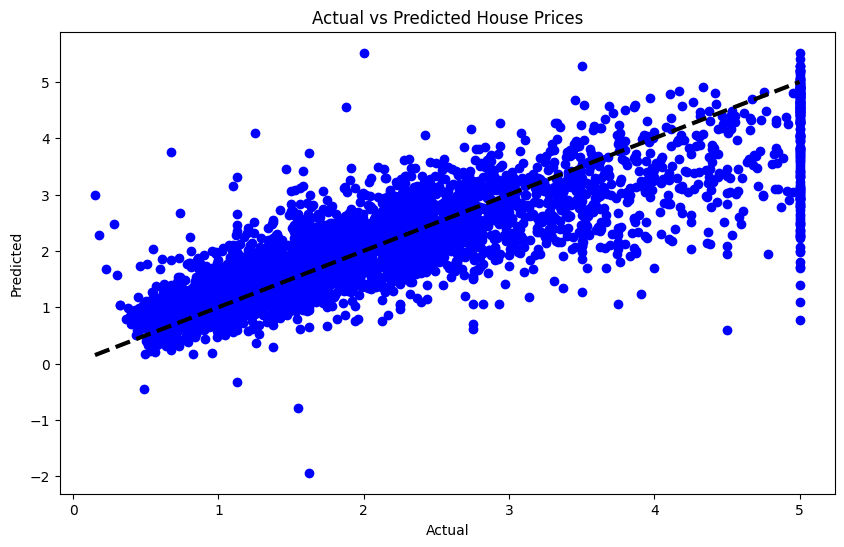

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


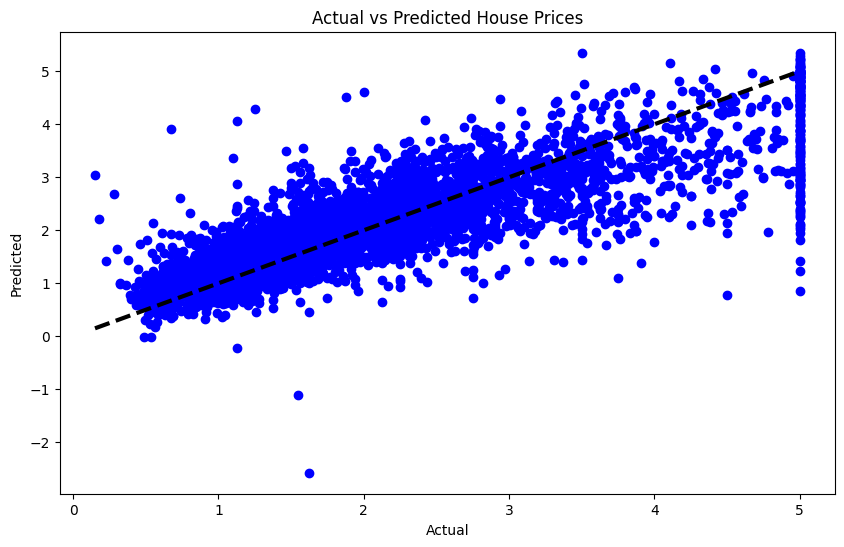

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


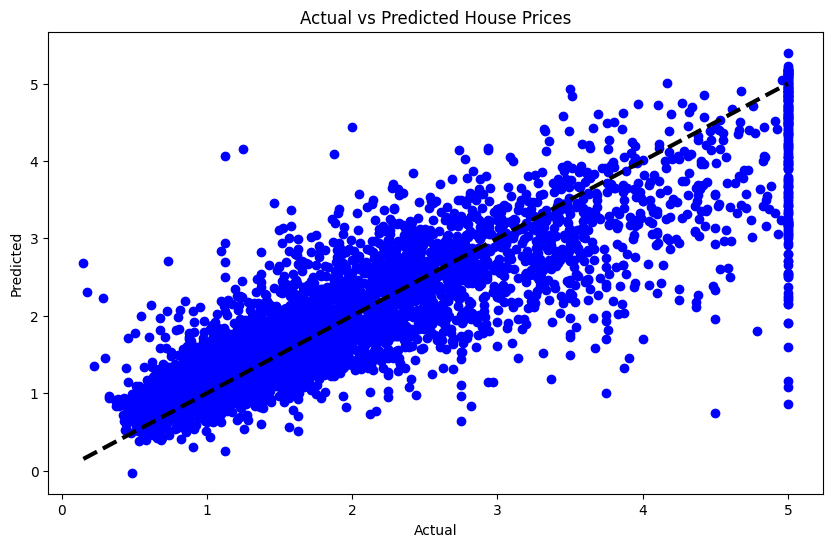

In [18]:
#Plot Actual vs Predicted House Prices

def plot_predictions(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, c='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted House Prices')
    plt.show()

plot_predictions(model_gd, X_test_scaled, y_test)
plot_predictions(model_sgd, X_test_scaled, y_test)
plot_predictions(model_adam, X_test_scaled, y_test)


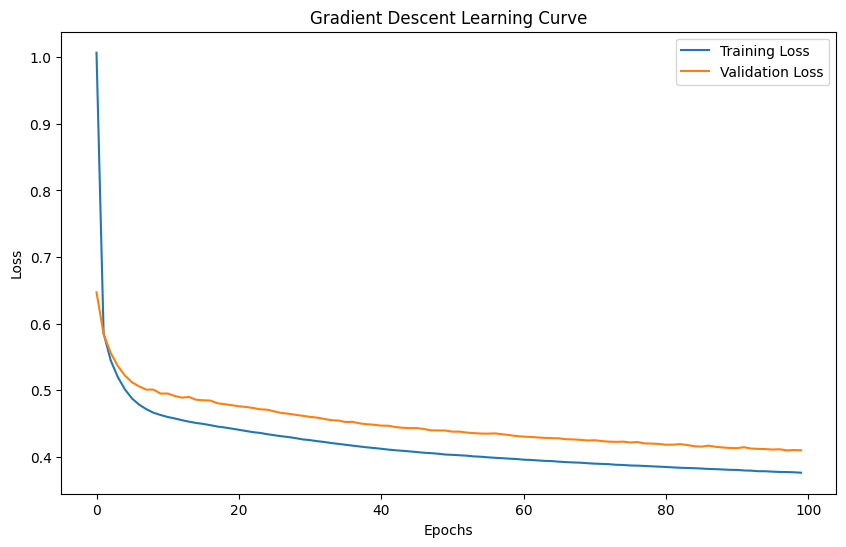

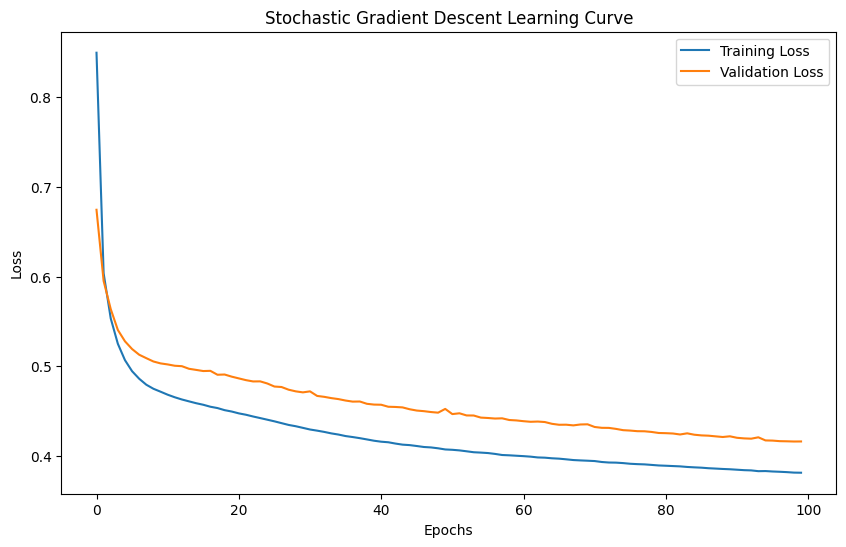

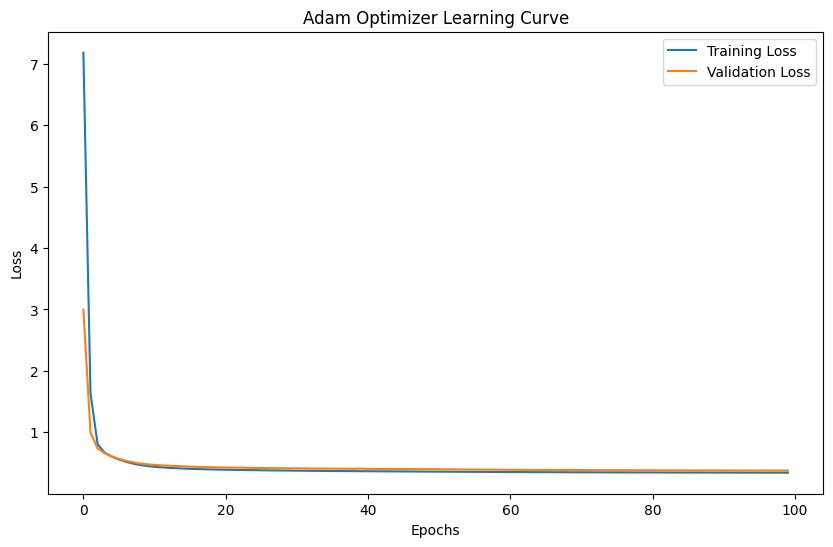

In [19]:
#Plot the Learning Curves

def plot_learning_curve(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_learning_curve(history_gd, 'Gradient Descent Learning Curve')
plot_learning_curve(history_sgd, 'Stochastic Gradient Descent Learning Curve')
plot_learning_curve(history_adam, 'Adam Optimizer Learning Curve')


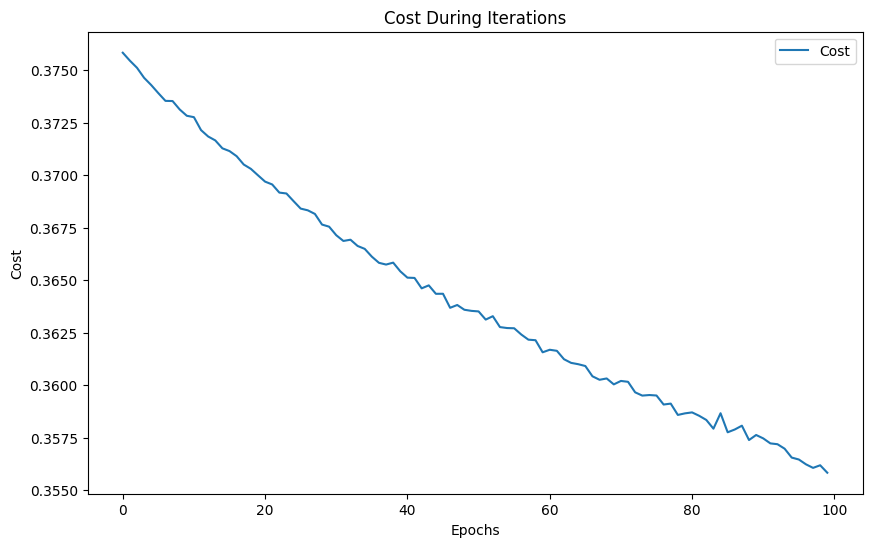

In [20]:
# Example using callbacks

class TrackWeightsAndCost(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.weights = []
        self.costs = []

    def on_epoch_end(self, epoch, logs=None):
        self.weights.append(self.model.get_weights())
        self.costs.append(logs['loss'])

tracker = TrackWeightsAndCost()

model_gd.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0, callbacks=[tracker])

# Plotting the weights and costs
plt.figure(figsize=(10, 6))
plt.plot(tracker.costs, label='Cost')
plt.title('Cost During Iterations')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()
